<a href="https://colab.research.google.com/github/yoheikikuta/US-patent-analysis/blob/master/colab/Comparison_ELMO_BERT_USE_W2V_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison_ELMO_BERT_USE_W2V_features

# Prerequisites

Authentication, data downloading.

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
GCS_BASE = "gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature"

target_features_dict = {
   "TransformerXL" : ["TransformerXL_feature_train_app_3000", "TransformerXL_feature_test_app_3000", "TransformerXL_feature_grants_3000_3000"],
   "BERT-2ndlastmean" : ["bert_2ndlastmean_feature_train_app_3000", "bert_2ndlastmean_feature_test_app_3000", "bert_2ndlastmean_feature_grants_3000_3000"],
   "BERT-pretrained-2ndlastmean" : ["bert_pretrained_2ndlastmean_feature_train_app_3000", "bert_pretrained_2ndlastmean_feature_test_app_3000", "bert_pretrained_2ndlastmean_feature_grants_3000_3000"],
   "BERT-Large-2ndlastmean" : ["bert_large_2ndlastmean_feature_train_app_3000", "bert_large_2ndlastmean_feature_test_app_3000", "bert_large_2ndlastmean_feature_grants_3000_3000"],
   "ELMO-512tokenmean" : ["elmo_512_feature_train_app_3000", "elmo_512_feature_test_app_3000", "elmo_512_feature_grants_3000_3000"],
   "ELMO-4096tokenmean" : ["elmo_4096_feature_train_app_3000", "elmo_4096_feature_test_app_3000", "elmo_4096_feature_grants_3000_3000"],
   "USE" : ["use_feature_train_app_3000", "use_feature_test_app_3000", "use_feature_grants_3000_3000"],
    "W2V" : ["w2v_100_feature_train_app_3000", "w2v_100_feature_test_app_3000", "w2v_100_feature_grants_3000_3000"],
   "fastText" : ["fasttext_300_feature_train_app_3000", "fasttext_300_feature_test_app_3000", "fasttext_300_feature_grants_3000_3000"],
}

## Data downloading

In [3]:
!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-info/citations_info_3000+3000.df.gz ./

!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/training_app_3000.df.gz ./  
!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/testset_app_3000.df.gz ./
!gsutil cp gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/grants_for_3000+3000.df.gz ./

Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-info/citations_info_3000+3000.df.gz...
- [1 files][506.5 KiB/506.5 KiB]                                                
Operation completed over 1 objects/506.5 KiB.                                    
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/training_app_3000.df.gz...
\ [1 files][ 45.0 MiB/ 45.0 MiB]                                                
Operation completed over 1 objects/45.0 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/testset_app_3000.df.gz...
\ [1 files][ 45.5 MiB/ 45.5 MiB]                                                
Operation completed over 1 objects/45.5 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-xml/grants_for_3000+3000.df.gz...
- [1 files][129.4 MiB/129.4 MiB]                                                
Operation completed over 1 objects/129.4 MiB.           

In [21]:
%%time

for model, files in target_features_dict.items():
  for f in files:
    !gsutil cp {GCS_BASE}/{model}/{f}.pkl.gz ./

Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/TransformerXL/TransformerXL_feature_train_app_3000.pkl.gz...
- [1 files][ 12.5 MiB/ 12.5 MiB]                                                
Operation completed over 1 objects/12.5 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/TransformerXL/TransformerXL_feature_test_app_3000.pkl.gz...
- [1 files][ 12.5 MiB/ 12.5 MiB]                                                
Operation completed over 1 objects/12.5 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/TransformerXL/TransformerXL_feature_grants_3000_3000.pkl.gz...
\ [1 files][ 26.8 MiB/ 26.8 MiB]                                                
Operation completed over 1 objects/26.8 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/patent-analysis/3000-extracted-feature/W2V/w2v_100_fea

In [5]:
!ls

adc.json			TransformerXL_feature_test_app_3000.pkl.gz
citations_info_3000+3000.df.gz	TransformerXL_feature_train_app_3000.pkl.gz
grants_for_3000+3000.df.gz	w2v_100_feature_grants_3000_3000.pkl.gz
sample_data			w2v_100_feature_test_app_3000.pkl.gz
testset_app_3000.df.gz		w2v_100_feature_train_app_3000.pkl.gz
training_app_3000.df.gz


# Naive similarities using raw features

Check cosine similarities using the extracted features.

## Binary classification problem using the extracted fesatures

In [0]:
import pandas as pd
import numpy as np

In [0]:
citations_info_target = pd.read_pickle("./citations_info_3000+3000.df.gz")
test_app = pd.read_pickle("./testset_app_3000.df.gz")
grants = pd.read_pickle("./grants_for_3000+3000.df.gz")
train_app = pd.read_pickle("./training_app_3000.df.gz")

In [0]:
train_data = pd.merge(train_app, citations_info_target, on='app_id')[["app_id", "parsed"]]
dev_data = pd.merge(test_app, citations_info_target, on='app_id')[["app_id", "parsed"]]

In [0]:
train_data['label'] = 1
dev_data['label'] = 1

In [10]:
train_data.head()

,app_id,parsed,label
0,12130785,7212849,1
1,12652424,7814459,1
2,12652424,7814459,1
3,12214532,7652956,1
4,14204411,7439432,1


In [0]:
def pick_up_uncited_grants(df, app_id, n=1, random_state=23):
    '''
    Randomly pick up uncited grant pair to a given app_id for generating negative samples.
    '''
    n_rows = df[ df['app_id'] != app_id ].sample(n=n, random_state=random_state)
    
    return [n_rows['parsed'].values[0], 0]

In [12]:
seed = 23

train_non_cited_data = pd.DataFrame([
    [app_id] + pick_up_uncited_grants(train_data, app_id, random_state=seed+idx)
    for idx, (app_id)
    in enumerate(train_data['app_id'])
])

train_non_cited_data.columns = train_data.columns

train_non_cited_data.head()

,app_id,parsed,label
0,12130785,7848141,0
1,12652424,7992009,0
2,12652424,7896548,0
3,12214532,7236946,0
4,14204411,6910200,0


In [13]:
seed = 23

dev_non_cited_data = pd.DataFrame([
    [app_id] + pick_up_uncited_grants(dev_data, app_id, random_state=seed+idx)
    for idx, (app_id)
    in enumerate(dev_data['app_id'])
])

dev_non_cited_data.columns = dev_data.columns

dev_non_cited_data.head()

,app_id,parsed,label
0,12211548,7264313,0
1,12765236,7294763,0
2,12827269,7559338,0
3,14436491,8012217,0
4,13633425,8305811,0


In [14]:
train_data = pd.concat([train_data, train_non_cited_data]).reset_index(drop=True)
dev_data = pd.concat([dev_data, dev_non_cited_data]).reset_index(drop=True)

train_data = train_data.sample(frac=1, random_state=seed).reset_index(drop=True)
dev_data = dev_data.sample(frac=1, random_state=seed).reset_index(drop=True)

train_data.head()

,app_id,parsed,label
0,12000676,7751044,0
1,12507166,7519470,1
2,12852271,6963389,0
3,12871308,7917688,1
4,13796666,7111455,1


In [0]:
def _read_feature(target_dict, model):
  train_fpath, test_fpath, grant_fpath = target_dict[model]
  train_app_f = pd.read_pickle(f"./{train_fpath}.pkl.gz")
  test_app_f = pd.read_pickle(f"./{test_fpath}.pkl.gz")
  grant_f = pd.read_pickle(f"./{grant_fpath}.pkl.gz")
  
  assert 3000 == train_app_f.shape[0]
  assert 3000 == test_app_f.shape[0]
  assert 6440 == grant_f.shape[0]
  
  return train_app_f, test_app_f, grant_f

In [0]:
def _prepare_feature_for_labeled_data(target_dict, model):
  train_app_f, test_app_f, grant_f = _read_feature(target_dict, model)
  
  train_feature = np.empty((len(train_data), train_app_f.shape[1] + grant_f.shape[1]))
  test_feature = np.empty((len(dev_data), test_app_f.shape[1] + grant_f.shape[1]))
  
  for i in range(len(train_data)):
    app_id = train_data["app_id"][i]
    idx_app = train_app[train_app["app_id"] == app_id ].index.values[0]

    parsed = train_data["parsed"][i]
    idx_grant = grants[grants["parsed"] == parsed].index.values[0]

    f = np.concatenate([train_app_f[idx_app], grant_f[idx_grant]])
    train_feature[i] = f

  for i in range(len(dev_data)):
    app_id = dev_data["app_id"][i]
    idx_app = test_app[test_app["app_id"] == app_id ].index.values[0]

    parsed = dev_data["parsed"][i]
    idx_grant = grants[grants["parsed"] == parsed].index.values[0]

    f = np.concatenate([test_app_f[idx_app], grant_f[idx_grant]])
    test_feature[i] = f

  train_label = np.array(train_data["label"].values.tolist())
  test_label = np.array(dev_data["label"].values.tolist())
    
  return train_feature, train_label, test_feature, test_label

### Classification with lightgbm

In [0]:
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 250,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_child_weight': 2,
    'gamma': 0.2,
    'verbose': -1,
    'verbose_eval' : -1
}

In [0]:
def exp(target_dict, model):
  train_x, train_y, test_x, test_y = _prepare_feature_for_labeled_data(target_dict, model)
  lgb_train = lgb.Dataset(train_x[:2500], train_y[:2500])
  lgb_valid = lgb.Dataset(train_x[2500:], train_y[2500:])

  # Train a model.
  gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                early_stopping_rounds=10,
                valid_sets=lgb_valid)
  
  def _compute_acc(x, y):
    predict_prob = gbm.predict(x)
    predict_label = [ 1 if elem >= 0.5 else 0 for elem in predict_prob]
    acc = sum( np.array(predict_label) == np.array(y) ) / len(predict_label)
    return acc
  
  return _compute_acc(train_x, train_y), _compute_acc(test_x, test_y)

In [22]:
%%time

result = []

for model in target_features_dict.keys():
  print(f"Training a model using {model} features...")
  result.append([model, exp(target_features_dict, model)])

Training a model using TransformerXL features...
[1]	valid_0's binary_logloss: 0.688505
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.685686
[3]	valid_0's binary_logloss: 0.680314
[4]	valid_0's binary_logloss: 0.677631
[5]	valid_0's binary_logloss: 0.673285
[6]	valid_0's binary_logloss: 0.668814
[7]	valid_0's binary_logloss: 0.665148
[8]	valid_0's binary_logloss: 0.661425
[9]	valid_0's binary_logloss: 0.658829
[10]	valid_0's binary_logloss: 0.656267
[11]	valid_0's binary_logloss: 0.651366
[12]	valid_0's binary_logloss: 0.648178
[13]	valid_0's binary_logloss: 0.64456
[14]	valid_0's binary_logloss: 0.6431
[15]	valid_0's binary_logloss: 0.640933
[16]	valid_0's binary_logloss: 0.638161
[17]	valid_0's binary_logloss: 0.636693
[18]	valid_0's binary_logloss: 0.635743
[19]	valid_0's binary_logloss: 0.633394
[20]	valid_0's binary_logloss: 0.631834
[21]	valid_0's binary_logloss: 0.629729
[22]	valid_0's binary_logloss: 0.626703
[23]	valid_0's binary

In [0]:
for model, (train_acc, test_acc) in result:
  print("-" * 20)
  print(f"{model} result:")
  print(f"  Train ACC: {train_acc:.4f}")
  print(f"  Test ACC: {test_acc:.4f}")

RECORD:

```
--------------------
TransformerXL result:
  Train ACC: 0.8219
  Test ACC: 0.7825
--------------------
BERT-2ndlastmean result:
  Train ACC: 0.8234
  Test ACC: 0.8019
--------------------
BERT-pretrained-2ndlastmean result:
  Train ACC: 0.7815
  Test ACC: 0.7506
--------------------
ELMO-512tokenmean result:
  Train ACC: 0.8532
  Test ACC: 0.8255
--------------------
ELMO-4096tokenmean result:
  Train ACC: 0.8575
  Test ACC: 0.8322
--------------------
USE result:
  Train ACC: 0.8637
  Test ACC: 0.8484
--------------------
W2V result:
  Train ACC: 0.8943
  Test ACC: 0.8632
--------------------
fastText result:
  Train ACC: 0.8404
  Test ACC: 0.8245
```

## Ranking problem using the extracted features

Similarities will be computed by simple cosine similarity of the extracted features.  
The extracted features are constructed from only claim texts.

In [0]:
def _test_label(app_id, grant, cite_relation):
  cited_parsed = cite_relation[cite_relation["app_id"] == app_id]["parsed"]
  return [1 if parsed == cited_parsed.values[0] else 0 for parsed in grant["parsed"]]

In [0]:
def _compute_similarities(target_dict, model):
  similarities = []
  train_app_f, test_app_f, grant_f = _read_feature(target_dict, model)
  
  for t_feature in test_app_f:
    similarities.append(np.array(list(
        map(lambda g_feature: np.dot(t_feature, g_feature) / (np.linalg.norm(t_feature * np.linalg.norm(g_feature))), grant_f)
    )))
   
  return similarities

In [0]:
def compute_ranking(target_dict, model):
  similarities = _compute_similarities(target_dict, model)
  rankings = []
  
  for idx in range(len(similarities)):
    app_id = test_app["app_id"][idx]
    label = pd.Series(_test_label(app_id, grants, citations_info_target))

    i, = np.where(label == 1)
    cited_index = i[0]

    rank = sorted(similarities[idx], reverse=True).index(similarities[idx][cited_index])
    rankings.append(rank)
  
  return rankings

In [0]:
def compute_positive_count(rankings):
  return [sum(np.array(rankings) <= thrd) for thrd in range(len(grants))]

In [28]:
%%time

ranking_result = []

for model in target_features_dict.keys():
  print(f"Computing rankings using {model} features...")
  rankings = compute_ranking(target_features_dict, model)
  positive_counts = compute_positive_count(rankings)
  ranking_result.append([model, rankings, positive_counts])

Computing rankings using TransformerXL features...
Computing rankings using W2V features...
CPU times: user 11min 6s, sys: 1.35 s, total: 11min 7s
Wall time: 11min 7s


In [0]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 8,8

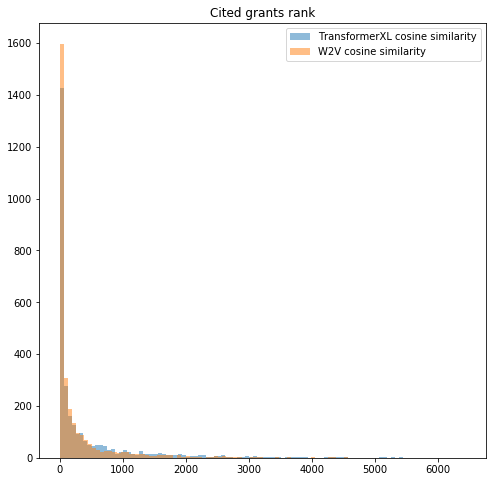

In [30]:
for model, ranking, _ in ranking_result:
  plt.hist(ranking, alpha=0.5, bins=100, label=f"{model} cosine similarity")

plt.title("Cited grants rank")
plt.legend()
plt.show()

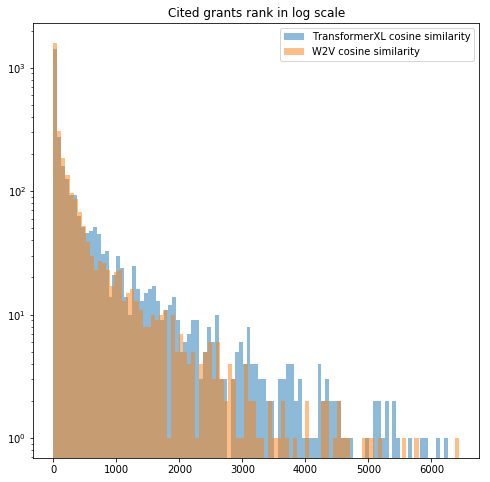

In [31]:
for model, ranking, _ in ranking_result:
  plt.hist(ranking, alpha=0.5, bins=100, label=f"{model} cosine similarity")

plt.yscale('log')
plt.title("Cited grants rank in log scale")
plt.legend()
plt.show()

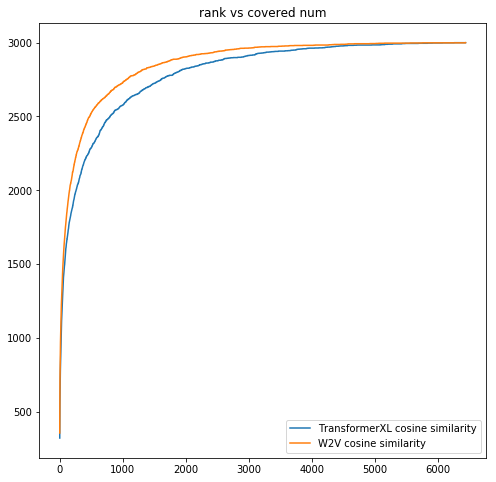

In [32]:
for model, _, positive_count in ranking_result:
  plt.plot(range(len(grants)), positive_count, label=f"{model} cosine similarity")

plt.title("rank vs covered num")
plt.legend()
plt.show()

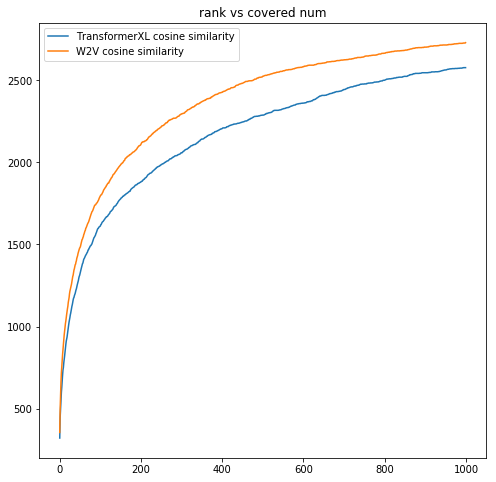

In [33]:
for model, _, positive_count in ranking_result:
  plt.plot(range(1000), positive_count[:1000], label=f"{model} cosine similarity")

plt.title("rank vs covered num")
plt.legend()
plt.show()

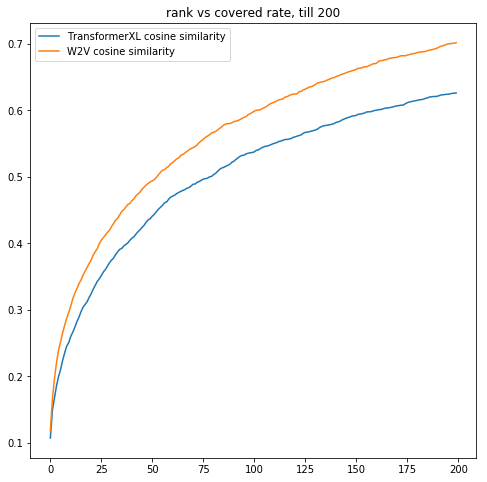

In [34]:
for model, ranking, positive_count in ranking_result:
  plt.plot(range(200), (np.array(positive_count)/len(ranking))[0:200], label=f"{model} cosine similarity")

plt.title("rank vs covered rate, till 200")
plt.legend()
plt.show()

In [0]:
for model, ranking, positive_count in ranking_result:
  print("-" * 20)
  print(f"{model} top 10: {(np.array(positive_count)/len(ranking))[10]:.4f}")
  print(f"{model} top 100: {(np.array(positive_count)/len(ranking))[100]:.4f}")
  print(f"{model} top 200: {(np.array(positive_count)/len(ranking))[200]:.4f}")

RECORD:

```
--------------------
TransformerXL top 10: 0.2600
TransformerXL top 100: 0.5377
TransformerXL top 200: 0.6273
--------------------
BERT-2ndlastmean top 10: 0.2527
BERT-2ndlastmean top 100: 0.5050
BERT-2ndlastmean top 200: 0.5923
--------------------
BERT-pretrained-2ndlastmean top 10: 0.2997
BERT-pretrained-2ndlastmean top 100: 0.5773
BERT-pretrained-2ndlastmean top 200: 0.6657
--------------------
ELMO-512tokenmean top 10: 0.2367
ELMO-512tokenmean top 100: 0.5280
ELMO-512tokenmean top 200: 0.6260
--------------------
ELMO-4096tokenmean top 10: 0.2620
ELMO-4096tokenmean top 100: 0.5357
ELMO-4096tokenmean top 200: 0.6407
--------------------
USE top 10: 0.3400
USE top 100: 0.6467
USE top 200: 0.7480
--------------------
W2V top 10: 0.3057
W2V top 100: 0.5990
W2V top 200: 0.7037
--------------------
fastText top 10: 0.1767
fastText top 100: 0.3690
fastText top 200: 0.4473
```

# Triplet Loss model

Train triplet loss models for each extracted feature.  
The models have the same output dimension that are used to compute similarities.

## Data handling

In [0]:
import os
import datetime
import pickle
import gzip
import math
import pandas as pd
import numpy as np

import tensorflow as tf

tf.enable_eager_execution()

In [37]:
tf.__version__

'1.14.0'

In [0]:
citations_info_target = pd.read_pickle("./citations_info_3000+3000.df.gz")
test_app = pd.read_pickle("./testset_app_3000.df.gz")
grants = pd.read_pickle("./grants_for_3000+3000.df.gz")
train_app = pd.read_pickle("./training_app_3000.df.gz")

In [0]:
def read_feature(target_dict, model: str):
  train_fpath, test_fpath, grant_fpath = target_dict[model]
  train_app_f = pd.read_pickle(f"./{train_fpath}.pkl.gz")
  test_app_f = pd.read_pickle(f"./{test_fpath}.pkl.gz")
  grant_f = pd.read_pickle(f"./{grant_fpath}.pkl.gz")
  
  assert 3000 == train_app_f.shape[0]
  assert 3000 == test_app_f.shape[0]
  assert 6440 == grant_f.shape[0]
  
  return train_app_f, test_app_f, grant_f

In [0]:
tr, te, gr = read_feature(target_features_dict, "TransformerXL")

In [42]:
tr.shape

(3000, 1024)

In [0]:
def normalize_feature(train_app_f, test_app_f, grant_f):
    train_normalized_feature_dict = {
        k:v/np.linalg.norm(v) for k,v in zip(train_app['app_id'], train_app_f[:, ])
    }
    test_normalized_feature_dict = { 
        k:v/np.linalg.norm(v) for k,v in zip(test_app['app_id'], test_app_f[:, ])
    }
    grants_normalized_feature_dict = { 
        k:v/np.linalg.norm(v) for k,v in zip(grants['parsed'], grant_f[:, ])
    }
    
    return train_normalized_feature_dict, test_normalized_feature_dict, grants_normalized_feature_dict

In [0]:
tr_dict, te_dict, gr_dict = normalize_feature(tr, te, gr)

In [45]:
list(tr_dict.keys())[:5]

[12130785, 12652424, 12214532, 14204411, 13090122]

In [0]:
def to_df(train_normalized_feature_dict, test_normalized_feature_dict, grants_normalized_feature_dict):
    train_app_df = pd.DataFrame.from_dict(train_normalized_feature_dict).T
    test_app_df = pd.DataFrame.from_dict(test_normalized_feature_dict).T
    grants_target_df = pd.DataFrame.from_dict(grants_normalized_feature_dict).T
    
    return train_app_df, test_app_df, grants_target_df

In [0]:
tr_df, te_df, gr_df = to_df(tr_dict, te_dict, gr_dict)

In [48]:
tr_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
12130785,-0.057990,0.004074,0.003009,-0.018531,-0.019810,-0.023116,-0.000565,-0.004962,0.012903,0.008964,0.006161,-0.000338,0.026540,-0.030696,0.032509,-0.007807,-0.038119,0.002865,0.047996,-0.014135,0.017800,-0.018677,-0.002516,0.005561,0.023766,-0.024884,-0.059998,-0.003336,0.011202,-0.024692,-0.031925,-0.030141,0.035146,-0.011324,0.001487,-0.003497,0.025481,0.020793,-0.075682,0.013992,...,0.003509,-0.036742,-0.006580,-0.023237,0.040977,-0.011697,0.033603,0.005300,-0.030563,-0.024695,0.017072,0.005411,-0.064309,0.006695,-0.016412,-0.020368,-0.056072,0.019117,0.019697,0.015053,0.005632,-0.058167,-0.022091,0.016211,-0.005990,0.023458,0.029247,0.068072,-0.041110,0.008749,-0.060300,-0.027198,0.035809,-0.006763,0.055986,0.057033,0.018025,-0.008186,-0.041255,-0.009016
12652424,-0.064163,0.012789,0.013432,-0.040352,0.025748,-0.014943,-0.001424,-0.009653,0.018696,0.016312,0.020553,-0.019633,-0.004965,-0.026342,0.030716,-0.003315,0.012813,-0.002143,0.030921,-0.035191,-0.004962,-0.017244,-0.008916,0.037075,0.012831,-0.025909,-0.032528,-0.027768,-0.001031,-0.000173,-0.028137,-0.008449,0.024139,-0.054393,-0.036469,0.051039,0.055474,0.035394,-0.052734,-0.001005,...,-0.002607,-0.030803,-0.001073,-0.015508,-0.042985,-0.005574,0.005161,-0.000852,-0.013358,-0.029943,0.002573,-0.009765,-0.036228,0.025351,-0.006266,-0.027417,-0.030370,0.027437,-0.015146,-0.020284,0.011232,-0.085046,-0.034940,0.016008,-0.032622,0.020430,-0.034027,0.057790,-0.015533,-0.040200,-0.060967,-0.040000,0.056509,0.002180,0.006091,-0.008115,0.007994,-0.005393,-0.016460,0.009245
12214532,-0.085994,0.007758,-0.004244,-0.060099,-0.054567,-0.017564,-0.006382,-0.032181,0.028206,0.028611,0.005730,-0.007326,0.041661,-0.025720,0.020459,0.006422,-0.009961,-0.010982,-0.018587,-0.014620,-0.041961,-0.018851,-0.011925,0.040174,0.010684,0.004862,-0.043283,-0.010974,0.005305,0.008396,-0.005971,-0.020498,0.030810,-0.000767,-0.013120,0.041497,0.015322,0.069318,-0.021265,0.002010,...,-0.005172,-0.038300,0.021017,-0.007032,-0.028792,-0.032630,0.030373,0.008553,-0.013691,-0.009283,-0.019652,-0.001606,-0.031183,0.026850,-0.018095,-0.028501,-0.050440,0.012264,-0.023767,-0.014110,0.007431,-0.060766,-0.045617,0.007702,-0.027124,-0.018417,0.008350,0.048463,-0.008064,-0.064222,-0.065105,-0.058542,0.045759,-0.006159,0.024564,0.026717,0.021589,-0.017367,-0.011878,0.015246


In [49]:
sum(tr_df.iloc[0, :] ** 2)

1.0000000000000009

In [50]:
gr_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
6837113,-0.014580,0.006755,-0.006486,-0.051677,0.032175,-0.028131,0.016438,-0.020232,0.029790,0.012356,0.030545,-0.015917,-0.002257,-0.008249,0.016138,0.008264,0.024407,0.010204,0.023249,-0.022078,-0.017632,-0.001646,-0.012240,0.011818,0.018582,0.013639,-0.049592,0.007148,0.041827,0.026238,-0.032586,-0.022201,0.041521,0.021638,-0.007577,0.050724,0.064705,0.022341,-0.052675,0.010480,...,-0.005036,-0.058759,0.006284,-0.008225,0.013075,-0.018920,0.016680,-0.014534,-0.040749,-0.037140,0.004401,-0.034549,-0.022339,0.022631,-0.005050,-0.018074,-0.087235,0.024829,-0.041489,-0.014463,0.020158,-0.041703,-0.037300,0.040647,-0.009606,0.009968,-0.007062,0.052321,-0.017857,-0.064832,-0.088839,-0.007090,0.037800,-0.002673,0.014865,-0.000019,0.028869,-0.018798,0.003797,0.024422
6837224,-0.070658,0.016815,-0.030287,-0.070709,-0.059889,0.008608,0.007613,-0.018660,0.019162,0.031016,0.004750,-0.006049,0.057330,-0.040114,0.004878,0.000702,-0.051033,-0.012215,0.009279,-0.038725,-0.030123,-0.014945,-0.023538,0.008119,0.021968,-0.069535,-0.016447,-0.035090,-0.002602,-0.017436,0.017569,0.006479,0.017854,-0.032349,-0.001011,-0.001652,0.038647,-0.019962,-0.072725,-0.017328,...,-0.003277,-0.025241,-0.027713,-0.022922,-0.045940,-0.037631,-0.002564,0.014381,-0.013148,-0.030300,0.008720,-0.039647,-0.025446,0.032770,-0.039488,-0.040184,-0.078404,0.046014,0.038426,0.036305,0.013773,-0.030061,-0.010897,0.022885,-0.013945,0.010029,-0.016877,0.067642,0.003041,0.031152,-0.057681,-0.032179,0.025047,-0.001945,0.005105,-0.004102,0.011969,-0.000025,-0.030162,-0.019982
6837699,-0.051835,0.014400,-0.009105,-0.048751,-0.000463,-0.009048,0.016301,-0.023687,0.015278,0.001354,-0.014423,0.005180,0.041184,-0.013740,-0.006788,0.008000,-0.024933,0.007679,0.065952,-0.015855,-0.014371,-0.020575,-0.037539,0.028568,0.038689,-0.028896,-0.030498,-0.041273,0.020396,0.028794,-0.040594,-0.038149,0.005363,0.015915,0.006450,0.004483,0.077621,0.016988,-0.064624,0.002057,...,0.002164,-0.038825,-0.030116,-0.012743,-0.022026,-0.026617,0.020798,0.007637,-0.018386,-0.017497,0.015238,-0.000590,-0.022330,0.023064,-0.036540,-0.038091,-0.075532,0.064918,0.029383,0.033227,-0.010002,-0.040271,-0.012576,0.018321,-0.001046,0.007017,0.005724,0.010158,0.053685,0.033490,-0.056757,-0.036167,0.028293,-0.003320,0.003538,0.080948,0.016661,0.054622,-0.026371,-0.012752


In [0]:
def make_dict_from_chunk(df, grants_target_df):
    app_ids_u = df.index.values
    cited_df = citations_info_target.loc[:, ['app_id', 'parsed']]\
                   .drop_duplicates().set_index('app_id')\
                   .loc[app_ids_u, ['parsed']].reset_index()
    app_ids = cited_df.app_id.values
    grant_ids = cited_df.parsed.values
    grant_ids_u = cited_df.parsed.unique()
    app_ids_u_blob = df.reindex(app_ids_u).values
    grant_ids_u_blob = grants_target_df.reindex(grant_ids_u).values
    data_dict = {'app_ids_u':app_ids_u,
                 'app_ids':app_ids, 
                 'app_ids_u_blob': app_ids_u_blob,
                 'grant_ids_u':grant_ids_u,
                 'grant_ids':grant_ids,
                 'grant_ids_u_blob':grant_ids_u_blob}
    return data_dict


In [0]:
tr_data_dict = make_dict_from_chunk(tr_df, gr_df)

In [53]:
tr_data_dict.keys()

dict_keys(['app_ids_u', 'app_ids', 'app_ids_u_blob', 'grant_ids_u', 'grant_ids', 'grant_ids_u_blob'])

In [54]:
tr_data_dict['app_ids_u']

array([12130785, 12652424, 12214532, ..., 13968266, 12667685, 14601713])

In [55]:
tr_data_dict['grant_ids']

array([7212849, 7814459, 7652956, ..., 7810013, 6913298, 7554640])

## Train models

In [0]:
### LOSS FUNCTIONS: dist(a, b)
# Assume that 'a' has dimensions 18 x 100 and 'b' has dimensions 
# 34x100, we would like to produce a vector with all distances,
# having the shape 18 x 34.
# we hence first cast 'a' to a shape 18 x 1 x 100
# and then 'b' to a shape 1 x 34 x 100. 
# rules of broadcasting then give us a tensor of 18 x 34 x 100
# summing over the last axis only (axis=-1) gives us the desired
# 18 x 34 shape

### EUCLIDEAN DISTANCE
# def dist(a, b):
#     with tf.name_scope('dist'):
#         diffs = tf.expand_dims(a, axis=1) - tf.expand_dims(b, axis=0)
#         return tf.sqrt(tf.reduce_sum(tf.square(diffs), axis=-1) + 1e-12)

### COSINE DISTANCE
def dist(a, b):
    # Assume a and b are normalized to one.
    with tf.name_scope('dist'):
        prods = tf.math.multiply(tf.expand_dims(a, axis=1), tf.expand_dims(b, axis=0))
        unnormalized_dist = tf.subtract(tf.constant(1.0, dtype=tf.float32),
                                        tf.reduce_sum(prods, axis=-1))
        normalized_dist = tf.multiply(unnormalized_dist, 0.5)
        return normalized_dist + 1e-12

### COSINE ANGULAR DISTANCE
# def dist(a, b):
#     # Assume a and b are normalized to one.
#     with tf.name_scope('dist'):
#         prods = tf.math.multiply(tf.expand_dims(a, axis=1), tf.expand_dims(b, axis=0))
#         angular_dist = tf.acos(prods)
#         normalized_dist = tf.div(angular_dist, tf.constant(math.pi))
#         return normalized_dist + 1e-12

In [0]:
def calc_cited_mask(data_dict):
    aids_one_hot = tf.equal(tf.expand_dims(data_dict['app_ids_u'], axis=1),
                            tf.expand_dims(data_dict['app_ids'], axis=0))
    gids_one_hot = tf.equal(tf.expand_dims(data_dict['grant_ids'], axis=1),
                            tf.expand_dims(data_dict['grant_ids_u'], axis=0))
    cited_mask = tf.matmul(tf.cast(aids_one_hot, tf.int32), 
                           tf.cast(gids_one_hot, tf.int32))
    cited_mask = tf.equal(cited_mask, 1)
    return cited_mask
  
def batch_hard(dists, cited_mask, margin=0.2):
    # Assume that app_ids_unique has shape (18, ) and grant_ids_unique (34,)
    # app_ids and grant_ids have the same length, 36. This implies 
    # that there are 2 grants that appear twice.
    # We construct a mask for same identity of shape 18 x 34
    negative_mask = tf.logical_not(cited_mask)
    positive_mask = cited_mask
    furthest_positive = tf.reduce_max(dists * tf.cast(positive_mask, tf.float32), axis=1)
    closest_negative = tf.map_fn(lambda x:tf.reduce_min(
                                 tf.boolean_mask(x[0], x[1])),
                                 (dists, negative_mask), tf.float32)
    diff = furthest_positive - closest_negative
    loss = tf.maximum(diff + margin, 0.0)
    return loss
  
def calc_ranks(rdists, cited_mask):
    _, indices = tf.nn.top_k(-rdists, k=rdists.shape[1])
    _, indices = tf.nn.top_k(-indices, k=rdists.shape[1])
    indices = indices +1
    sorted_ranks = tf.sort(tf.reshape(tf.cast(cited_mask, tf.int32) * indices, [-1]))
    unique, vals, counts = tf.unique_with_counts(sorted_ranks)
    return dict(zip(unique.numpy(), counts.numpy()))

In [0]:
class Model(object):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.W = tf.Variable( tf.random_normal( [self.input_shape, self.output_shape] ), name='weight' )
        self.B = tf.Variable( tf.random_normal( [self.output_shape] ), name='bias' ) 
        self.variables = [self.W, self.B]
    
    def frwrd_pass(self,X_train):
        out = tf.matmul(X_train, self.W) + self.B
        normalized_out = tf.nn.l2_normalize(out, axis=1)
        return normalized_out

In [0]:
def get_batch(b_size, df, grants_target_df):
    df = df.sample(frac=1, random_state=23)
    for chunk in np.array_split(df, b_size):
        yield make_dict_from_chunk(chunk, grants_target_df)

In [0]:
def calc_dists_for_model(dd, model):
  app_ids_u_emb = model.frwrd_pass(dd['app_ids_u_blob'].astype('float32'))
  grant_ids_u_emb = model.frwrd_pass(dd['grant_ids_u_blob'].astype('float32'))
  dists = dist(app_ids_u_emb, grant_ids_u_emb)
  return dists

In [0]:
from tqdm import tqdm_notebook as tqdm

In [0]:
# Parameters.

OUTPUT_DIM = 100
EPOCHS = 50
BATCH_SIZE = 20
DEV_SIZE = 400

Train models using each extracted feature.

In [0]:
trained_models = {}

In [64]:
%%time

for model_name in target_features_dict.keys():
    print(f"{model_name} training...")
    tr, te, gr = read_feature(target_features_dict, model_name)
    tr_dict, te_dict, gr_dict = normalize_feature(tr, te, gr)
    tr_df, te_df, gr_df = to_df(tr_dict, te_dict, gr_dict)

    input_dim = tr.shape[1]  # Feature dimension.
    dev_data_dict = make_dict_from_chunk(te_df.iloc[:DEV_SIZE], gr_df)  # Used only to check a intermediate model performance (not used to train a model)

    model = Model(input_shape=input_dim, output_shape=OUTPUT_DIM)
    loss_history = []
    for i in tqdm(range(EPOCHS)):
        for data_dict in get_batch(BATCH_SIZE, tr_df, gr_df):
            with tf.GradientTape() as tape:
              dists = calc_dists_for_model(data_dict, model)
              cited_mask = calc_cited_mask(data_dict)
              losses = batch_hard(dists, cited_mask)
              loss = tf.reduce_mean(losses)
    
            global_step = tf.Variable(0, trainable=False, name='global_step')
            learning_rate = tf.train.exponential_decay(0.01, global_step, EPOCHS, 0.96, staircase=True)
            optimizer = tf.train.AdamOptimizer(learning_rate)
            loss_history.append(loss.numpy())
            grads = tape.gradient(loss, model.variables)
            optimizer.apply_gradients(zip(grads, model.variables), global_step=global_step)
  
        # After every epoch, we would like to check our ranking score on the dev_data_dict,
        # as well as on some subset of our training data dict
        dev_dists = calc_dists_for_model(dev_data_dict, model)
        dev_cited_mask = calc_cited_mask(dev_data_dict)
        dev_ranks = calc_ranks(dev_dists, dev_cited_mask)
        top_5_ranks = sum(list(dev_ranks.values())[1:6]) / DEV_SIZE
        top_1_rank = list(dev_ranks.values())[1] / DEV_SIZE
        print(f"Top 1 rank (%): {str(top_1_rank)}, Top 5 ranks (%): {str(top_5_ranks)}")

    trained_models[model_name] = {"model": model, "loss_history" : loss_history}


TransformerXL training...


W0816 06:10:26.801159 140612459042688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Top 1 rank (%): 0.255, Top 5 ranks (%): 0.49
Top 1 rank (%): 0.275, Top 5 ranks (%): 0.5125
Top 1 rank (%): 0.2825, Top 5 ranks (%): 0.5325
Top 1 rank (%): 0.2875, Top 5 ranks (%): 0.555
Top 1 rank (%): 0.2975, Top 5 ranks (%): 0.5575
Top 1 rank (%): 0.305, Top 5 ranks (%): 0.5675
Top 1 rank (%): 0.31, Top 5 ranks (%): 0.575
Top 1 rank (%): 0.31, Top 5 ranks (%): 0.5875
Top 1 rank (%): 0.315, Top 5 ranks (%): 0.59
Top 1 rank (%): 0.32, Top 5 ranks (%): 0.6025
Top 1 rank (%): 0.3325, Top 5 ranks (%): 0.62
Top 1 rank (%): 0.3475, Top 5 ranks (%): 0.6375
Top 1 rank (%): 0.3475, Top 5 ranks (%): 0.6675
Top 1 rank (%): 0.3475, Top 5 ranks (%): 0.6675
Top 1 rank (%): 0.3525, Top 5 ranks (%): 0.665
Top 1 rank (%): 0.36, Top 5 ranks (%): 0.665
Top 1 rank (%): 0.3625, Top 5 ranks (%): 0.6625
Top 1 rank (%): 0.3675, Top 5 ranks (%): 0.66
Top 1 rank (%): 0.355, Top 5 ranks (%): 0.6675
Top 1 rank (%): 0.375, Top 5 ranks (%): 0.6575
Top 1 rank (%): 0.3475, Top 5 ranks (%): 0.6675
Top 1 rank (%): 0.

Top 1 rank (%): 0.2925, Top 5 ranks (%): 0.595
Top 1 rank (%): 0.31, Top 5 ranks (%): 0.6125
Top 1 rank (%): 0.3225, Top 5 ranks (%): 0.625
Top 1 rank (%): 0.33, Top 5 ranks (%): 0.645
Top 1 rank (%): 0.335, Top 5 ranks (%): 0.6675
Top 1 rank (%): 0.3575, Top 5 ranks (%): 0.6725
Top 1 rank (%): 0.355, Top 5 ranks (%): 0.6775
Top 1 rank (%): 0.3625, Top 5 ranks (%): 0.6775
Top 1 rank (%): 0.3775, Top 5 ranks (%): 0.69
Top 1 rank (%): 0.385, Top 5 ranks (%): 0.7025
Top 1 rank (%): 0.4125, Top 5 ranks (%): 0.7175
Top 1 rank (%): 0.415, Top 5 ranks (%): 0.7175
Top 1 rank (%): 0.4075, Top 5 ranks (%): 0.7225
Top 1 rank (%): 0.41, Top 5 ranks (%): 0.7225
Top 1 rank (%): 0.42, Top 5 ranks (%): 0.725
Top 1 rank (%): 0.42, Top 5 ranks (%): 0.725
Top 1 rank (%): 0.425, Top 5 ranks (%): 0.7275
Top 1 rank (%): 0.4225, Top 5 ranks (%): 0.725
Top 1 rank (%): 0.4175, Top 5 ranks (%): 0.72
Top 1 rank (%): 0.4125, Top 5 ranks (%): 0.7225
Top 1 rank (%): 0.41, Top 5 ranks (%): 0.7275
Top 1 rank (%): 0.4

<function matplotlib.pyplot.show>

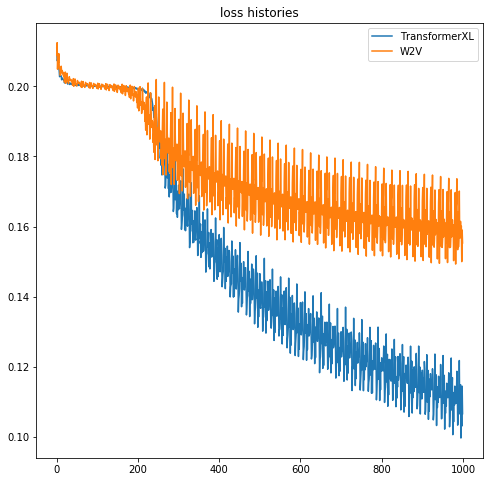

In [65]:
## Result of cosine distance
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

for model in trained_models.keys():
  plt.plot(trained_models[model]["loss_history"], label=f"{model}")

plt.title("loss histories")
plt.legend()
plt.show

## Compute similarities

In [0]:
def to_extracted_features(normalized_feature_dict, model):
  # doc_id is app_id for application, pared for grants.
  sorted_keys = sorted(normalized_feature_dict.keys())

  input_tensors = tf.convert_to_tensor(
      np.array([ normalized_feature_dict[k] for k in sorted_keys ]),
      dtype=tf.float32)
  extracted_features = model.frwrd_pass(input_tensors).numpy()
  return pd.DataFrame({ 
    'doc_id':sorted_keys, 'extracted_feature':[ v/np.linalg.norm(v) for v in extracted_features ]})

In [0]:
def sort_similarity_by_value(sim_dict, app_id):
    '''
    input:
        sim_dict: similary dictionary
        app_id: target application id
    return:
        [(parsed1, sim1), (parsed2, sim2), ...] sorted by similarities
    '''
    return [(parsed, sim_dict[app_id][parsed]) for parsed in sorted(sim_dict[app_id], key=sim_dict[app_id].get)]
  
  
def get_cited_grants(citations_info_target, app_id):
    '''
    input:
        citations_info_target: DataFrame of citation relationships
        app_id: target application id
    return:
        {parsed1, parsed2, ...} that are cited to reject app_id
    '''
    return set(citations_info_target[citations_info_target['app_id'] == app_id]['parsed'])
  
def make_uncited_grants_for_app_id(sim_dict, citations_info_target, app_id, sidx, eidx, num, shuffle=True):
    '''
    input:
        sim_dict: 
        citations_info_target:
        app_id: target application id
        sidx: start index to slice the sorted (parsed, sim) list
        eidx: end index to slice the sorted (parsed, sim) list
        num: number of grants that will be returned
    return:
        [parsed_1, parsed_2, ..., parsed_num] that are NOT cited to reject app_id
    '''
    sorted_grants_list = sort_similarity_by_value(sim_dict, app_id)
    sorted_grants_list = sorted_grants_list[sidx:eidx]
    if shuffle:
        random.shuffle(sorted_grants_list)
    
    cited_grants = get_cited_grants(citations_info_target, app_id)
    uncited_grants = []
    
    idx = 0
    while len(uncited_grants) != num:
        grant_id, _ = sorted_grants_list[idx]
        if not grant_id in cited_grants:
            uncited_grants.append(grant_id)
        idx += 1
    
    return uncited_grants  

In [0]:
import collections

def calc_all_ranks(all_app_ids, sim_dic):
  all_ranks = []

  for app_id in all_app_ids:
      cited_grants = get_cited_grants(citations_info_target, app_id)
      sorted_kv = reversed(sort_similarity_by_value(sim_dic, app_id))  # higher score, similar patent

      idx = 1
      for k,v in sorted_kv:
          if k in cited_grants:
              all_ranks.append(idx)
          idx += 1
  return all_ranks

def calc_all_ranks_counter(all_app_ids, sim_dic):
  return collections.Counter(calc_all_ranks(all_app_ids, sim_dic))

In [0]:
def create_sim_dict(test_extracted_df, grants_extracted_df):
  return {
    app_id:{ parsed:np.sum(test_f*grants_f)
            for parsed, grants_f 
            in zip(grants_extracted_df['doc_id'], grants_extracted_df['extracted_feature']) } 
    for app_id, test_f 
    in zip(test_extracted_df['doc_id'], test_extracted_df['extracted_feature'])
  }

In [0]:
def test_label(app_id, grant, cite_relation):
  cited_parsed = cite_relation[cite_relation["app_id"] == app_id]["parsed"]
  return [ 1 if parsed == cited_parsed.values[0] else 0 for parsed in grant["parsed"] ]

Compute similarities and rankings.

In [71]:
%%time

ranking_result = []

for model_name in target_features_dict.keys():
    print(f"{model_name} similarity computing...")
    tr, te, gr = read_feature(target_features_dict, model_name)
    tr_dict, te_dict, gr_dict = normalize_feature(tr, te, gr)
    tr_df, te_df, gr_df = to_df(tr_dict, te_dict, gr_dict)

    test_extracted_features_df = to_extracted_features(te_dict, trained_models[model_name]["model"])
    grants_extracted_features_df = to_extracted_features(gr_dict, trained_models[model_name]["model"])

    sim_dict_by_extracted = create_sim_dict(test_extracted_features_df, grants_extracted_features_df)
    similarities = [list(sim_dict_by_extracted[doc_id].values()) for doc_id in test_extracted_features_df['doc_id']]
    sim_arr = np.array(similarities)

    ranking = []
    for num in range(len(similarities)):
        app_id = test_extracted_features_df['doc_id'][num]
        label = pd.Series(test_label(app_id, grants, citations_info_target))
        i, = np.where(label == 1)
        cited_index = i[0]
        rank = sorted(similarities[num], reverse=True).index(similarities[num][cited_index])
        ranking.append(rank)
    
    ranking_arr = np.array(ranking)
    positive_counts = [sum(ranking_arr <= thrd) for thrd in range(len(grants))]

    ranking_result.append([model_name, ranking, positive_counts])

TransformerXL similarity computing...
W2V similarity computing...
CPU times: user 6min 11s, sys: 2.82 s, total: 6min 13s
Wall time: 6min 14s


In [0]:
for model, ranking, positive_count in ranking_result:
  print("-" * 20)
  print(f"{model} top 10: {(np.array(positive_count)/len(ranking))[10]:.4f}")
  print(f"{model} top 100: {(np.array(positive_count)/len(ranking))[100]:.4f}")
  print(f"{model} top 200: {(np.array(positive_count)/len(ranking))[200]:.4f}")

RECORD:

```
--------------------
TransformerXL top 10: 0.3653
TransformerXL top 100: 0.6687
TransformerXL top 200: 0.7543
--------------------
BERT-2ndlastmean top 10: 0.3860
BERT-2ndlastmean top 100: 0.6983
BERT-2ndlastmean top 200: 0.7953
--------------------
BERT-pretrained-2ndlastmean top 10: 0.3957
BERT-pretrained-2ndlastmean top 100: 0.7067
BERT-pretrained-2ndlastmean top 200: 0.7920
--------------------
ELMO-512tokenmean top 10: 0.2950
ELMO-512tokenmean top 100: 0.6057
ELMO-512tokenmean top 200: 0.7093
--------------------
ELMO-4096tokenmean top 10: 0.3243
ELMO-4096tokenmean top 100: 0.6327
ELMO-4096tokenmean top 200: 0.7300
--------------------
USE top 10: 0.3703
USE top 100: 0.6690
USE top 200: 0.7627
--------------------
W2V top 10: 0.4053
W2V top 100: 0.7353
W2V top 200: 0.8310
--------------------
fastText top 10: 0.3183
fastText top 100: 0.6043
fastText top 200: 0.7000
```

Simple cosine similarity results (without triplet loss training):

```
--------------------
TransformerXL top 10: 0.2600
TransformerXL top 100: 0.5377
TransformerXL top 200: 0.6273
--------------------
BERT-2ndlastmean top 10: 0.2527
BERT-2ndlastmean top 100: 0.5050
BERT-2ndlastmean top 200: 0.5923
--------------------
BERT-pretrained-2ndlastmean top 10: 0.2997
BERT-pretrained-2ndlastmean top 100: 0.5773
BERT-pretrained-2ndlastmean top 200: 0.6657
--------------------
ELMO-512tokenmean top 10: 0.2367
ELMO-512tokenmean top 100: 0.5280
ELMO-512tokenmean top 200: 0.6260
--------------------
ELMO-4096tokenmean top 10: 0.2620
ELMO-4096tokenmean top 100: 0.5357
ELMO-4096tokenmean top 200: 0.6407
--------------------
USE top 10: 0.3400
USE top 100: 0.6467
USE top 200: 0.7480
--------------------
W2V top 10: 0.3057
W2V top 100: 0.5990
W2V top 200: 0.7037
--------------------
fastText top 10: 0.1767
fastText top 100: 0.3690
fastText top 200: 0.4473
```

# Trial and Errors

In [0]:
test_extracted_features_df = to_extracted_features(te_dict, models[0])
grants_extracted_features_df = to_extracted_features(gr_dict, models[0])

In [0]:
## Result of cosine distance
%%time

sim_dict_by_extracted = create_sim_dict(test_extracted_features_df, grants_extracted_features_df)
counter = calc_all_ranks_counter(test_extracted_features_df['doc_id'], sim_dict_by_extracted)
print(counter)

Counter({1: 435, 2: 200, 4: 107, 3: 104, 5: 76, 6: 68, 7: 64, 8: 62, 9: 52, 10: 47, 13: 40, 11: 39, 14: 39, 12: 38, 15: 38, 17: 35, 19: 32, 18: 29, 23: 26, 20: 25, 16: 24, 26: 24, 25: 20, 34: 19, 22: 18, 39: 17, 29: 17, 27: 16, 42: 16, 74: 16, 21: 15, 32: 15, 24: 15, 37: 15, 30: 14, 53: 14, 57: 13, 48: 13, 61: 13, 36: 13, 72: 12, 65: 12, 44: 12, 35: 11, 52: 11, 45: 11, 68: 11, 56: 11, 58: 10, 41: 10, 54: 10, 80: 9, 46: 9, 31: 9, 51: 9, 50: 9, 62: 9, 38: 9, 85: 8, 73: 8, 28: 8, 82: 8, 67: 8, 70: 8, 59: 8, 33: 8, 40: 8, 91: 8, 66: 7, 47: 7, 87: 7, 78: 7, 211: 7, 43: 7, 60: 7, 121: 7, 115: 7, 95: 7, 84: 6, 107: 6, 100: 6, 244: 6, 273: 6, 104: 6, 117: 6, 310: 6, 177: 6, 119: 6, 106: 6, 90: 6, 125: 5, 138: 5, 193: 5, 88: 5, 99: 5, 162: 5, 129: 5, 174: 5, 64: 5, 152: 5, 266: 5, 83: 5, 140: 5, 163: 5, 76: 5, 75: 5, 112: 5, 118: 5, 79: 5, 122: 5, 116: 5, 202: 4, 223: 4, 71: 4, 81: 4, 131: 4, 180: 4, 195: 4, 254: 4, 156: 4, 281: 4, 136: 4, 103: 4, 224: 4, 197: 4, 109: 4, 150: 4, 137: 4, 172: 4,

In [0]:
similarities = [list(sim_dict_by_extracted[doc_id].values()) for doc_id in test_extracted_features_df['doc_id']]
sim_arr = np.array(similarities)
sim_arr.shape

(3000, 6440)

In [0]:
%%time

ranking = []

for num in range(len(similarities)):

  app_id = test_extracted_features_df['doc_id'][num]
  label = pd.Series(test_label(app_id, grants, citations_info_target))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(similarities[num], reverse=True).index(similarities[num][cited_index])
  ranking.append(rank)

CPU times: user 42 s, sys: 9.25 ms, total: 42 s
Wall time: 42.1 s


In [0]:
%%time

ranking_arr = np.array(ranking)
positive_counts = [sum(ranking_arr <= thrd) for thrd in range(len(grants))]

CPU times: user 41.5 s, sys: 4.3 ms, total: 41.5 s
Wall time: 41.5 s


In [0]:
%%time

ranking_result = []

for model in target_features_dict.keys():
  print(f"Computing rankings using {model} features...")
  rankings = compute_ranking(target_features_dict, model)
  positive_counts = compute_positive_count(rankings)
  ranking_result.append([model, rankings, positive_counts])

In [0]:
 (np.array(positive_counts)/len(ranking))[10], (np.array(positive_counts)/len(ranking))[100],  (np.array(positive_counts)/len(ranking))[200]

(0.387, 0.7013333333333334, 0.7936666666666666)

In [0]:
 (np.array(positive_counts)/len(ranking))[10], (np.array(positive_counts)/len(ranking))[100],  (np.array(positive_counts)/len(ranking))[200]

(0.36733333333333335, 0.6736666666666666, 0.775)

```
USE top 10: 0.3400
USE top 100: 0.6467
USE top 200: 0.7480
```

In [0]:
sim = compute_similarities(target_features_dict, "USE")

In [0]:
sim[0]

array([0.59243876, 0.49336826, 0.35891418, ..., 0.3547594 , 0.61351997,
       0.54102679])

In [0]:
ranking = compute_ranking(sim)

In [0]:
ranking[:3]

[14, 0, 789]

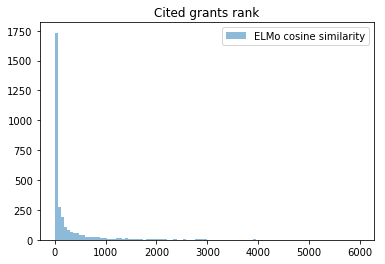

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking, alpha=0.5, bins=100, label="ELMo cosine similarity")
plt.title("Cited grants rank")
plt.legend()
plt.show()

In [0]:
%%time

tf, tl, tef, tel = _prepare_feature_for_labeled_data(target_features_dict, "ELMO-512tokenmean")

CPU times: user 25.7 s, sys: 199 ms, total: 25.9 s
Wall time: 25.8 s


In [0]:
tf

array([[ 0.04146077,  0.33466873, -0.02438193, ..., -0.05138287,
         0.35489544,  0.18244757],
       [ 0.19946417,  0.28654307, -0.03343014, ..., -0.16085735,
         0.07497395, -0.05243134],
       [ 0.24413267,  0.03050674, -0.2599768 , ..., -0.0933385 ,
         0.19614401,  0.1279701 ],
       ...,
       [ 0.15222813,  0.09087709, -0.13535395, ..., -0.05091184,
        -0.05838778, -0.03196971],
       [ 0.30256709,  0.24646774, -0.14956102, ..., -0.10359577,
         0.23123719,  0.00610641],
       [ 0.06816008,  0.33493641, -0.21586779, ..., -0.10068552,
         0.39663556,  0.11206492]])

In [0]:
train_app_f, test_app_f, grant_f = _read_feature(target_features_dict, "USE")

In [0]:
grant_f.shape

(6440, 512)

In [0]:
assert train_app_f.shape == (3000, 512)